In [1]:
# Install required libraries (Run this only once)
!pip install tensorflow scikit-learn matplotlib pandas


In [ ]:
# ML Assignment 3 - ANN based Bank Churn Prediction

import pandas as pd

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dropping useless customer identification columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encode categorical columns (Gender + Geography)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])   # Female = 0, Male = 1

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)  # Features
y = df["Exited"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((8000, 11), (2000, 11))

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Build ANN Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Input + Hidden layer 1
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(units=16, activation='relu'))

# Output layer (Sigmoid → binary output)
model.add(Dense(units=1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model (Track Training & Validation accuracy)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7304 - loss: 0.5489 - val_accuracy: 0.8125 - val_loss: 0.4296
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4563 - val_accuracy: 0.8175 - val_loss: 0.4089
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8080 - loss: 0.4393 - val_accuracy: 0.8275 - val_loss: 0.3963
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.4230 - val_accuracy: 0.8370 - val_loss: 0.3832
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8271 - loss: 0.4080 - val_accuracy: 0.8465 - val_loss: 0.3709
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8376 - loss: 0.4012 - val_accuracy: 0.8535 - val_loss: 0.3629
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3834 - val_accuracy: 0.8535 - val_loss: 0.3576
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8386 - loss: 0.3850 - val_accuracy: 0.

## Plot Accuracy Curve

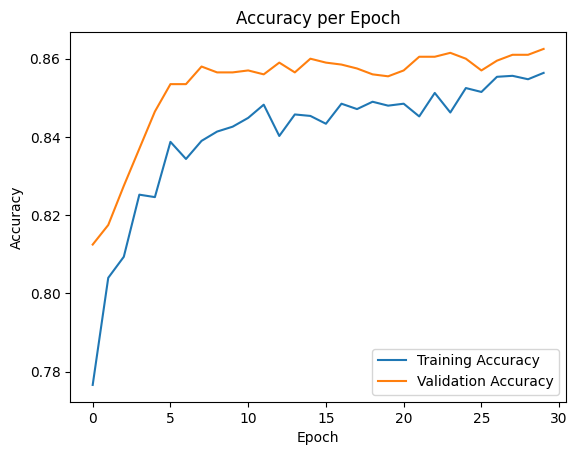

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Prediction + Accuracy + Confusion Matrix

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Final Accuracy: 0.8625

Confusion Matrix:
 [[1530   77]
 [ 198  195]]
